<a href="https://colab.research.google.com/github/ShrivastavAbhishek2004/AIML_Training/blob/main/Assesment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import all important Libraries

In [27]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

2. Load titanic database

In [2]:
# Load the dataset
file_path = '/content/taitanic.csv'
data = pd.read_csv(file_path)

3. Perform EDA- Exploratotary Data Analysis

In [3]:
# Display basic information about the dataset
data_info = data.info()
data_head = data.head()
data_description = data.describe(include='all')

data_info, data_head, data_description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None,
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450  

4. Impute any Missing Values

In [4]:
# Check missing values distribution
missing_values = data.isnull().sum()

<ipython-input-5-66e796aaca2d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")


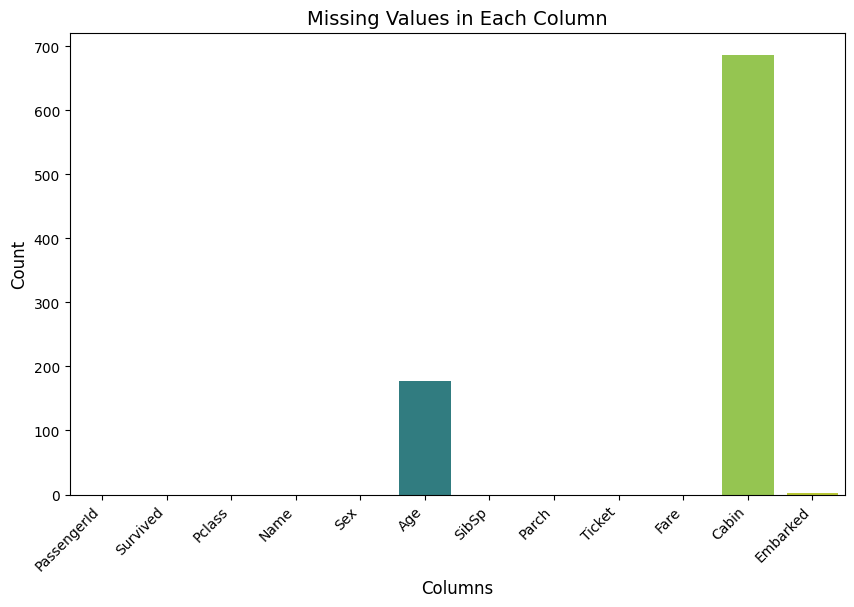

In [5]:
# Plot missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette="viridis")
plt.title("Missing Values in Each Column", fontsize=14)
plt.ylabel("Count", fontsize=12)
plt.xlabel("Columns", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.show()

<ipython-input-6-5ba684782e4b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x="Survived", palette="pastel")


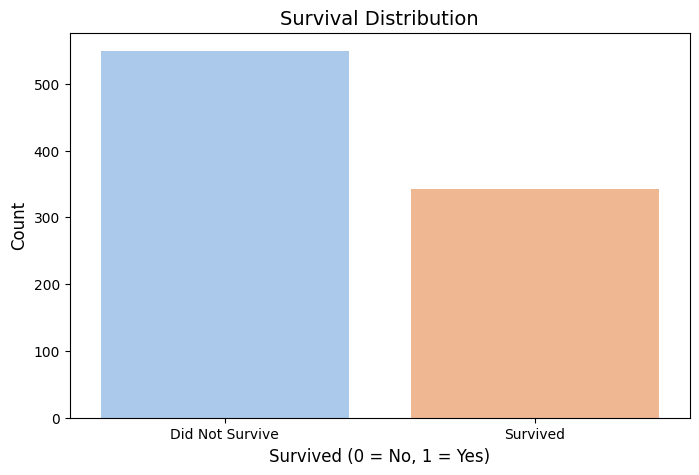

In [6]:
# Univariate analysis: Distribution of 'Survived'
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x="Survived", palette="pastel")
plt.title("Survival Distribution", fontsize=14)
plt.xlabel("Survived (0 = No, 1 = Yes)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks([0, 1], labels=["Did Not Survive", "Survived"])
plt.show()

5. Normalize all final data

In [7]:
# Handle missing values (impute with median for 'Age' and 'Fare')
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Fare'].fillna(data['Fare'].median(), inplace=True)

<ipython-input-7-47c7fcbc7716>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
<ipython-input-7-47c7fcbc7716>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [10]:
# Select numerical columns to normalize
numerical_columns = ['Age', 'Fare', 'SibSp', 'Parch']
scaler = MinMaxScaler()

In [11]:
# Normalize the numerical columns
data_normalized = data.copy()
data_normalized[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [12]:
# Display the first few rows of the normalized data
data_normalized[numerical_columns].head()

,Age,Fare,SibSp,Parch
0,0.271174,0.014151,0.125,0.0
1,0.472229,0.139136,0.125,0.0
2,0.321438,0.015469,0.000,0.0
3,0.434531,0.103644,0.125,0.0
4,0.434531,0.015713,0.000,0.0


6. Apply logistic Regression topredict survivors on test data set

In [13]:
# Encode categorical variables
data_encoded = data_normalized.copy()
data_encoded['Sex'] = data_encoded['Sex'].map({'male': 0, 'female': 1})
data_encoded['Embarked'] = data_encoded['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [14]:
# Drop non-essential columns for modeling
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
data_encoded.drop(columns=columns_to_drop, inplace=True)

In [15]:
# Split data into features (X) and target (y)
X = data_encoded.drop(columns=['Survived'])
y = data_encoded['Survived']

In [16]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Train logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [25]:
# Make predictions
y_pred = logreg.predict(X_test)

In [26]:
# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
classification = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, classification, conf_matrix

(0.7988826815642458,
 '              precision    recall  f1-score   support\n\n           0       0.81      0.86      0.83       105\n           1       0.78      0.72      0.75        74\n\n    accuracy                           0.80       179\n   macro avg       0.80      0.79      0.79       179\nweighted avg       0.80      0.80      0.80       179\n',
 array([[90, 15],
        [21, 53]]))

7. Confusion Matrix and Accuracy dashboard display

In [28]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [29]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

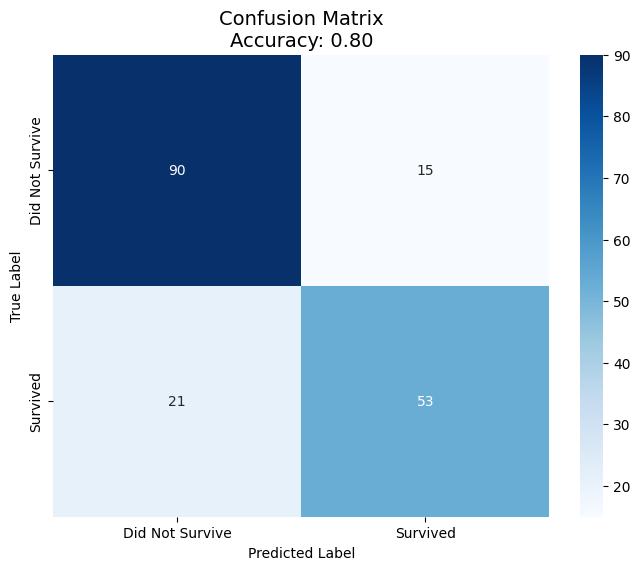

In [30]:
# Create confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Survive', 'Survived'], yticklabels=['Did Not Survive', 'Survived'])
plt.title(f"Confusion Matrix\nAccuracy: {accuracy:.2f}", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [31]:
# Print Classification Report (for dashboard completeness)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

